# Validating A/B Test Results

Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but companies must pay license fees if they want access to administrative controls, including integration with user management systems like ActiveDirectory.

Yammer has a centralized Analytics team, which sits in the Engineering organization. Their primary goal is to drive better product and business decisions using data. They do this partially by providing tools and education that make other teams within Yammer more effective at using data to make better decisions. They also perform ad-hoc analysis to support specific decisions.

Yammer not only develops new features, but is continuously looking for ways to improving existing ones. Like many software companies, Yammer frequently tests these features before releasing them to all of thier customers. These A/B tests help analysts and product managers better understand a feature’s effect on user behavior and the overall user experience.

This case focuses on an improvement to Yammer’s core “publisher”—the module at the top of a Yammer feed where users type their messages. To test this feature, the product team ran an A/B test from June 1 through June 30. During this period, some users who logged into Yammer were shown the old version of the publisher (the “control group”), while other other users were shown the new version (the “treatment group”).

On July 1, you check the results of the A/B test. You notice that message posting is 50% higher in the treatment group—a huge increase in posting.

Our job is to determine whether this feature is the real deal or too good to be true.

![A/B Testing Image](https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png)

## Modules and Data
Here we load the modules which we will be using for the data analysis along with the data itself.  The data created through querying the Mode Analytics database and exporting the results to csv files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
Query1 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 1.csv')
Query2 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 2.csv')
Query3 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 3.csv')
Query4 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 4.csv')
Query5 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 5.csv')
Query6 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 6.csv')
Query7 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 7.csv')
Query8 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 8.csv')
Query9 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 9.csv')
Query10 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 10.csv')
Query11 = pd.read_csv(r'C:\Users\Mike\GIT Bash\Validating-A-B-Test-Results\Query-Data\Query 11.csv')

## A/B Test Results

The table from Query1 summarizes the A/B test results that were acquired and a definition of each item can be found below:

- users: The total number of users shown that version of the publisher.
- total_treated_users: The number of users who were treated in either group.
- treatment_percent: The number of users in that group as a percentage of the total number of treated users.
- total: The total number of messages posted by that treatment group.
- average: The average number of messages per user in that treatment group (total/users).
- rate_difference: The difference in posting rates between treatment groups (group average - control group average).
- rate_lift: The percent difference in posting rates between treatment groups ((group average / control group average) - 1).
- stdev: The standard deviation of messages posted per user for users in the treatment group. For example, if there were three people in the control group and they posted 1, 4, and 8 messages, this value would be the standard deviation of 1, 4, and 8 (which is 2.9).
- t_stat: A test statistic for calculating if average of the treatment group is statistically different from the average of the control group. It is calculated using the averages and standard deviations of the treatment and control groups.
- p_value: Used to determine the test’s statistical significance.


In [4]:
print(Query1)

         experiment experiment_group  users  total_treated_users  \
0  publisher_update    control_group   1746                 2595   
1  publisher_update       test_group    849                 2595   

   treatment_percent  total  average  rate_difference  rate_lift   stdev  \
0             0.6728   4660   2.6690           0.0000      0.000  3.5586   
1             0.3272   3460   4.0754           1.4064      0.527  4.7676   

   t_stat  p_value  
0  0.0000      1.0  
1  7.6245      0.0  


## Verifying Data and Test Calculations

First off we can start by verifying the data and test calculations.  Query2 and Query 3 provide the list of control group and test group users and their messages sent.  Using these we can check that the means, standard deviations and test statistics.  Matching values will help verify that data and calculations are correct.

In [5]:
Query2["metric"].mean()

2.6689576174112255

In [6]:
Query3["metric"].mean()

4.075382803297997

In [7]:
Query2["metric"].std()

3.5586496185573373

In [8]:
Query3["metric"].std()

4.767615734141134

In [9]:
stats.ttest_ind(Query3["metric"], Query2["metric"], equal_var=False)

Ttest_indResult(statistic=7.624496277835627, pvalue=4.655640735000748e-14)

We can see that the values we set out to verify do in fact match and it looks like there are no issues with the data or test calculations.  Furthermore we can see that a two-sided test for the null hypothesis was used with an assumption that the variances of both samples are unequal, also known as Welch's t-test.

## Verifying User Treatment

Accurate A/B Test results require that users are assigned to the control group and test groups randomly. Using the data collected we can examine the users in each group to look for inconsistencies.  Query4 shows experiment group distribution by month activated, Query5 shows experiment group distribution by device type and Query6 shows experiment group distribution by language preference.

In [10]:
print(Query4)

        month_activated  control_users  test_users
0   2013-01-01 00:00:00             24          13
1   2013-02-01 00:00:00             27          20
2   2013-03-01 00:00:00             15          32
3   2013-04-01 00:00:00             28          27
4   2013-05-01 00:00:00             15          30
5   2013-06-01 00:00:00             22          19
6   2013-07-01 00:00:00             32          32
7   2013-08-01 00:00:00             41          38
8   2013-09-01 00:00:00             37          45
9   2013-10-01 00:00:00             46          45
10  2013-11-01 00:00:00             49          39
11  2013-12-01 00:00:00             49          57
12  2014-01-01 00:00:00             68          52
13  2014-02-01 00:00:00             75          51
14  2014-03-01 00:00:00             81          60
15  2014-04-01 00:00:00             82          86
16  2014-05-01 00:00:00            182         203
17  2014-06-01 00:00:00            873           0


In [11]:
Query4['month_activated'] = Query4['month_activated'].str.split(expand=True)[0]

In [14]:
print(Query4)

   month_activated  control_users  test_users
0       2013-01-01             24          13
1       2013-02-01             27          20
2       2013-03-01             15          32
3       2013-04-01             28          27
4       2013-05-01             15          30
5       2013-06-01             22          19
6       2013-07-01             32          32
7       2013-08-01             41          38
8       2013-09-01             37          45
9       2013-10-01             46          45
10      2013-11-01             49          39
11      2013-12-01             49          57
12      2014-01-01             68          52
13      2014-02-01             75          51
14      2014-03-01             81          60
15      2014-04-01             82          86
16      2014-05-01            182         203
17      2014-06-01            873           0


In [62]:
Query4['month_activated'].values.tolist()

['2013-01-01',
 '2013-02-01',
 '2013-03-01',
 '2013-04-01',
 '2013-05-01',
 '2013-06-01',
 '2013-07-01',
 '2013-08-01',
 '2013-09-01',
 '2013-10-01',
 '2013-11-01',
 '2013-12-01',
 '2014-01-01',
 '2014-02-01',
 '2014-03-01',
 '2014-04-01',
 '2014-05-01',
 '2014-06-01']

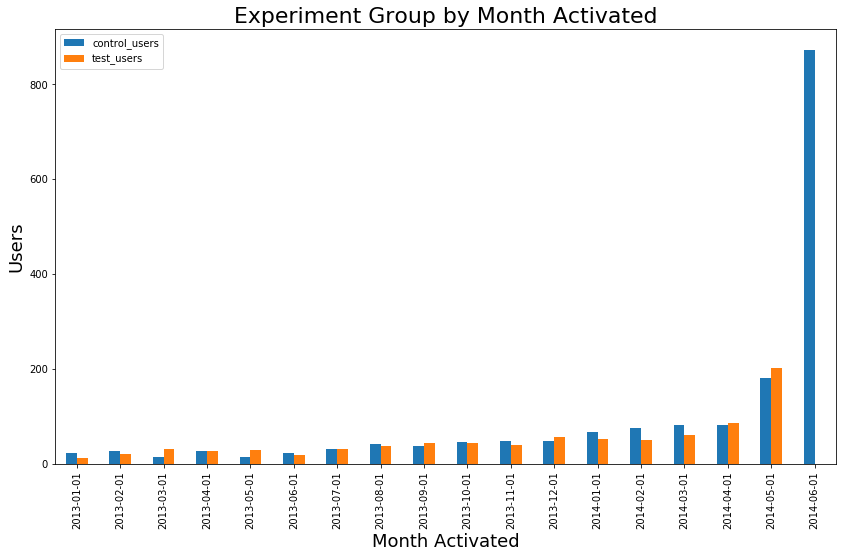

In [94]:
Query4.plot.bar(x='month_activated', figsize=(14,8))
plt.title("Experiment Group by Month Activated", fontsize=22)
plt.xlabel("Month Activated", fontsize=18)
plt.ylabel("Users", fontsize=18)
plt.show()

In [15]:
print(Query5)

  device_type  control_users  test_users
0      tablet            217          92
1      mobile            522         288
2    computer           1007         469


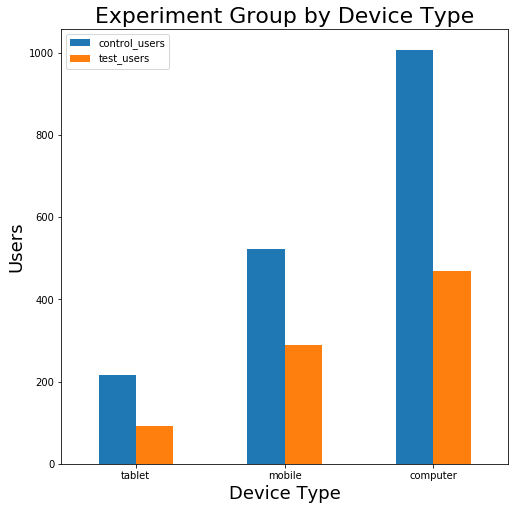

In [96]:
Query5.plot.bar(x='device_type', figsize=(8,8), rot=0)
plt.title("Experiment Group by Device Type", fontsize=22)
plt.xlabel("Device Type", fontsize=18)
plt.ylabel("Users", fontsize=18)
plt.show()

In [16]:
print(Query6)

     language  control_users  test_users
0      arabic             62          31
1     chinese             55          33
2     english            907         439
3      french            147          59
4      german             95          46
5      indian             56          22
6     italian             43          16
7    japanese            108          60
8      korean             29          15
9   portugese             41          23
10    russian             45          26
11    spanish            158          79


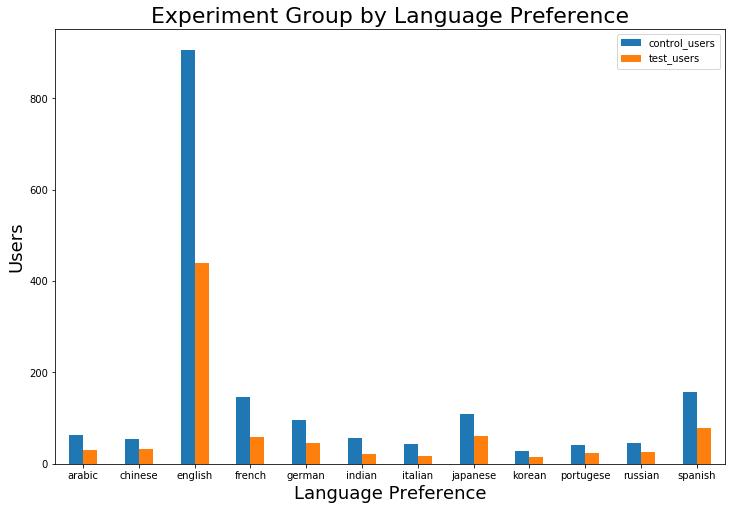

In [102]:
Query6.plot.bar(x='language', figsize=(12,8), rot=0)
plt.title("Experiment Group by Language Preference", fontsize=22)
plt.xlabel("Language Preference", fontsize=18)
plt.ylabel("Users", fontsize=18)
plt.show()

From the results it is clear that the 873 newest users were all placed into the control group.  Randomly assigning them to the test group would require modifying the table data so instead we will choose to exclude these users from the A/B test.  This leads to the results in Query7.

In [17]:
print(Query7)

         experiment experiment_group  users  total_treated_users  \
0  publisher_update    control_group    873                 1722   
1  publisher_update       test_group    849                 1722   

   treatment_percent  total  average  rate_difference  rate_lift   stdev  \
0              0.507   2546   2.9164            0.000     0.0000  3.8758   
1              0.493   3460   4.0754            1.159     0.3974  4.7676   

   t_stat       p_value  
0  0.0000  1.000000e+00  
1  5.5266  3.200000e-08  


# Selecting a Metric

The A/B test checks for improved results due to changes in the "publisher" which allows users to send messages.  A key idea in A/B testing is conversion rate, or the percentage of people who come to our site to do what we want them to do.  Ultimately, Yammer attempts to increase engagement to increase use and drive license purchases.  Using this idea, we can measure the conversion rate in other ways.  Query8 measures days logged in per user.  Query9 shows number of engagement events per user.  Using more metrics we can get a better picture of the impact of the improvement.

In [18]:
print(Query8)

         experiment experiment_group  users  total_treated_users  \
0  publisher_update    control_group    873                 1722   
1  publisher_update       test_group    849                 1722   

   treatment_percent  total  average  rate_difference  rate_lift   stdev  \
0              0.507   2778   3.1821           0.0000     0.0000  2.3354   
1              0.493   3057   3.6007           0.4186     0.1315  2.6986   

   t_stat   p_value  
0  0.0000  1.000000  
1  3.4377  0.000586  


In [19]:
print(Query9)

         experiment experiment_group  users  total_treated_users  \
0  publisher_update    control_group    873                 1722   
1  publisher_update       test_group    849                 1722   

   treatment_percent  total  average  rate_difference  rate_lift    stdev  \
0              0.507  25363  29.0527           0.0000     0.0000  33.1020   
1              0.493  31755  37.4028           8.3501     0.2874  38.9146   

   t_stat   p_value  
0  0.0000  1.000000  
1  4.7901  0.000002  


Although both test statistics and p values are lower than the original test for messages sent we can see that the p value is still much lower than 0.05 which is a reasonable threshold of statistical significance.

## Verifying Stastistical Methods

Earlier we determined that a Welch's t-test was used to determine if the difference between the two samples was statistically significant.  In statistics, Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. Welch's t-test is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes.  Student's t-test assumes that the two populations have normal distributions with equal variances. Welch's t-test is designed for unequal variances, but the assumption of normality is maintained.  Using this we can check to see if both samples have normal distributions and unequal variances as assumed to determine if the appropriate test was used.  To test for normality we can visually observe each distribution using histograms / box plots and conduct a Kolmogorov–Smirnov test and Shapiro–Wilk test.  To test for variance we can use Levene's test.

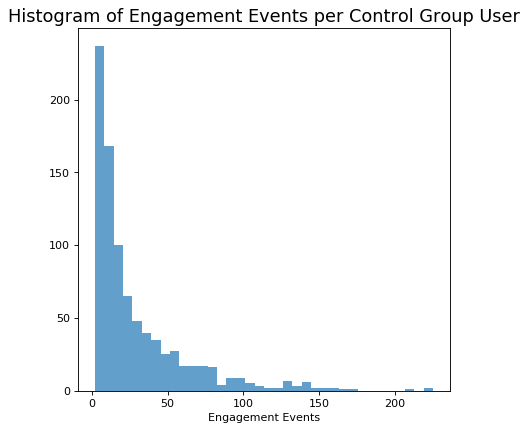

In [20]:
# Draw Plot
plt.figure(figsize=(6,6), dpi= 80)
sns.distplot(Query10['metric'], kde=False, hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

# Decoration
plt.title('Histogram of Engagement Events per Control Group User', fontsize=16)
plt.xlabel("Engagement Events")
plt.show()

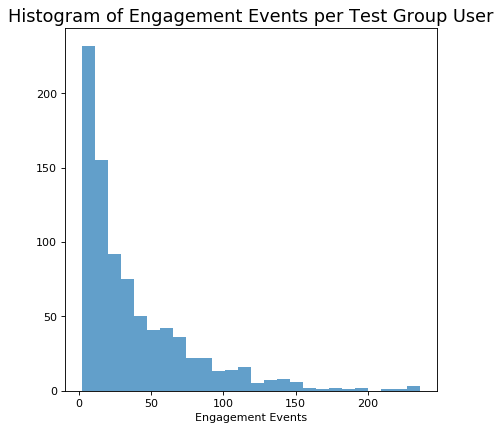

In [21]:
# Draw Plot
plt.figure(figsize=(6,6), dpi= 80)
sns.distplot(Query11['metric'], kde=False, hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

# Decoration
plt.title('Histogram of Engagement Events per Test Group User', fontsize=16)
plt.xlabel("Engagement Events")
plt.show()

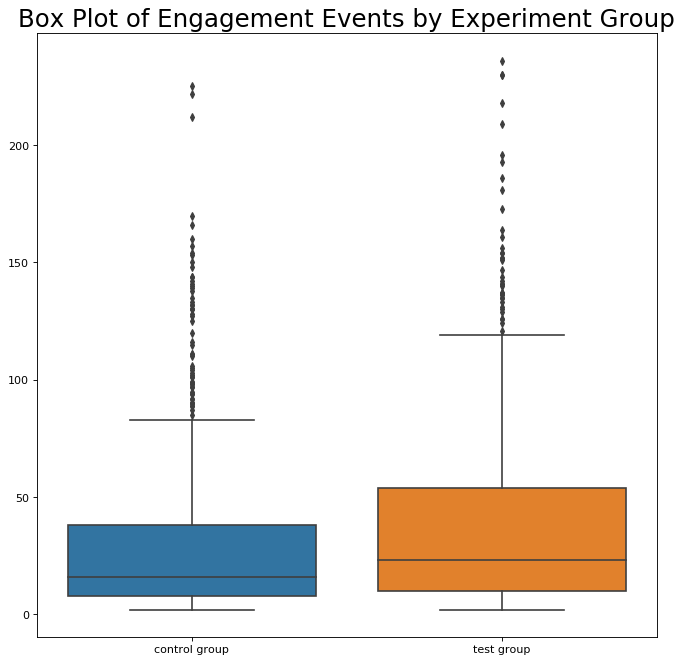

In [22]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10,10), dpi= 80)
sns.boxplot(data=[Query10['metric'].values, Query11['metric'].values], notch=False)

# Decoration
ax.set_xticklabels(['control group','test group'])
plt.title('Box Plot of Engagement Events by Experiment Group', fontsize=22)
plt.show()

In [23]:
experiment_groups = pd.DataFrame(columns=['control group', 'test group'])

In [24]:
stats.kstest(rvs=Query10["metric"], cdf='norm')

KstestResult(statistic=0.9772498680518208, pvalue=0.0)

In [25]:
stats.shapiro(Query10["metric"])

(0.7451919913291931, 1.4717682888086889e-34)

In [26]:
stats.kstest(rvs=Query11["metric"], cdf='norm')

KstestResult(statistic=0.9772498680518208, pvalue=0.0)

In [27]:
stats.shapiro(Query11["metric"])

(0.799629807472229, 4.308668748447521e-31)

In [28]:
stats.levene(Query10["metric"], Query11["metric"])

LeveneResult(statistic=16.43564837014963, pvalue=5.25765365833527e-05)

After examining the results it can be clearly seen that although the variances are indeed unequal, the distributions of both samples are not normal as assumed.  In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.  But unlike the t-test it does not require the assumption of normal distributions.

In [29]:
stats.ttest_ind(Query11["metric"], Query10["metric"], equal_var=False)

Ttest_indResult(statistic=4.7900531368261365, pvalue=1.8157433853044827e-06)

In [30]:
stats.mannwhitneyu(Query11["metric"], Query10["metric"])

MannwhitneyuResult(statistic=317954.0, pvalue=1.66700820055325e-07)

Ultimately both tests still produce a p value much lower than 0.05 which allows us the reject the null hypothesis that the two samples are equal.  We can confidently confirm that the improvements made produced strong results.